# A. Stoichiometry and reaction currents

1) First recreate the stoichiometric matrices for the modules 1 and 2 (eq (45) and eq(46))

2) Then lets build a hypergraph to describe the modules 1,2

In [ ]:
# small change

In [23]:
import hypernetx as hnx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import warnings 
#init_printing(use_unicode=True)
warnings.simplefilter('ignore')

from sympy import *

hnx. __version__


'2.4.0'

## Device 1 SM and hypergraph


In [24]:

# first need to define a matrix that contains the reactions between the species 
# (the stoichiometric matrix) using sympy


stoich_matrix_1 = Matrix( [[-1, 1, 0], [1, -1, -1], [0, 0, 1], [-1, 0, -1], [0, 1, 0]] )

# print the stoichiometric matrix for device 1: 

print("Full stoichiometric matrix for device 1")

stoich_matrix_1 # this is (45)


Full stoichiometric matrix for device 1


Matrix([
[-1,  1,  0],
[ 1, -1, -1],
[ 0,  0,  1],
[-1,  0, -1],
[ 0,  1,  0]])

In [25]:
# Can split the system into internal X and external Y species according to (45):

stoich_matrix_1_X = stoich_matrix_1[:3, :]

print("Reduced SM for internal components:")
stoich_matrix_1_X

Reduced SM for internal components:


Matrix([
[-1,  1,  0],
[ 1, -1, -1],
[ 0,  0,  1]])

In [26]:
# Can split the system into internal X and external Y species according to (45):

stoich_matrix_1_Y = stoich_matrix_1[3:, :]

print("Reduced SM matrix for external components")
stoich_matrix_1_Y

Reduced SM matrix for external components


Matrix([
[-1, 0, -1],
[ 0, 1,  0]])


Now we have the stoichiometric matrices we know the relationships between species and reactions
so now can make the hypergraphs

<class 'sympy.matrices.dense.MutableDenseMatrix'>


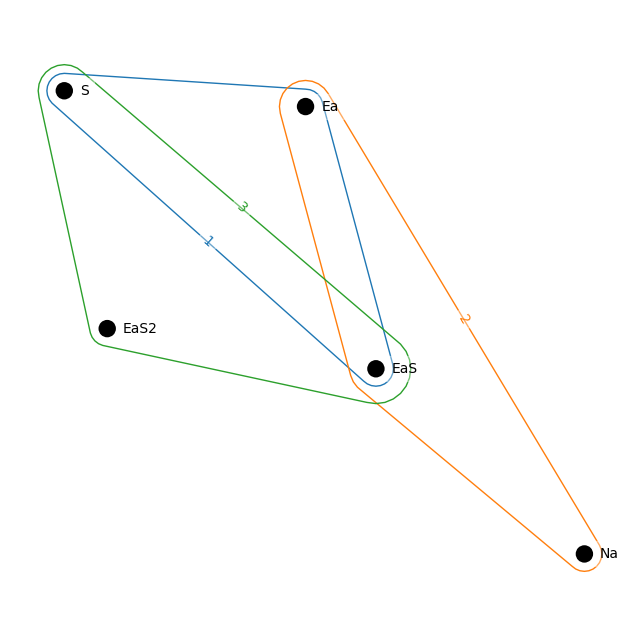

In [27]:
# device 1

node_labels_1 = {0: 'Ea', 1: 'EaS', 2: 'EaS2', 3: 'S', 4: 'Na'}

H = hnx.Hypergraph.from_incidence_matrix(stoich_matrix_1) 

#hnx.draw(H, node_labels = node_labels_1)

hnx.draw(
    H,
    node_labels=node_labels_1,
    with_edge_labels=True,
    edge_labels={i: str(i+1) for i in range(len(H.edges))}
)

print(type(stoich_matrix_1))
# the full graph for device 1:

## Device 2 SM and hypergraph

In [28]:
stoich_matrix_2 = Matrix([[-1, 0, 1, 0, 0], # first row of internal
                           [1, -1, 0, -1, 0], 
                           [0, 1, -1, 0, 1], 
                           [0, 0, 0, 1, -1],
                             [0, 0, 0, -1, 0], # first row external 
                             [0, 0, 0, 0, 1],
                             [-1, 0, 0, 0, 0],
                             [0, 0, 1, 0, 0]])

stoich_matrix_2 # this is just (46)

Matrix([
[-1,  0,  1,  0,  0],
[ 1, -1,  0, -1,  0],
[ 0,  1, -1,  0,  1],
[ 0,  0,  0,  1, -1],
[ 0,  0,  0, -1,  0],
[ 0,  0,  0,  0,  1],
[-1,  0,  0,  0,  0],
[ 0,  0,  1,  0,  0]])

In [29]:
# split full SM into internal:

stoich_matrix_2_X = stoich_matrix_2[:4,:]

stoich_matrix_2_X

Matrix([
[-1,  0,  1,  0,  0],
[ 1, -1,  0, -1,  0],
[ 0,  1, -1,  0,  1],
[ 0,  0,  0,  1, -1]])

In [30]:
# extract external part

stoich_matrix_2_Y = stoich_matrix_2[4:,:]

stoich_matrix_2_Y

Matrix([
[ 0, 0, 0, -1, 0],
[ 0, 0, 0,  0, 1],
[-1, 0, 0,  0, 0],
[ 0, 0, 1,  0, 0]])

### Now can build the hypergraph for device 2: first i will try by making seperate hypergraphs for internal, external then doing the full graph

KeyError: 4

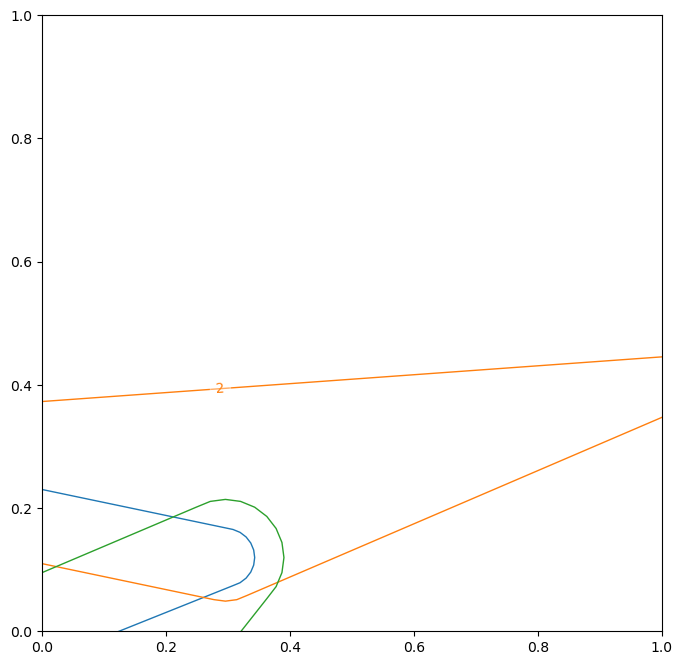

In [31]:
# First for internal:

node_labels_2_X = {0: 'Eb', 1: 'EbF', 2: 'EbW', 3: 'Eb*'} # in order according to (50)

graph_X = hnx.Hypergraph.from_incidence_matrix(stoich_matrix_2_X) 

hnx.draw(
    H,
    node_labels=node_labels_2_X,
    with_edge_labels=True,
    edge_labels={i: str(i+1) for i in range(len(H.edges))}
)


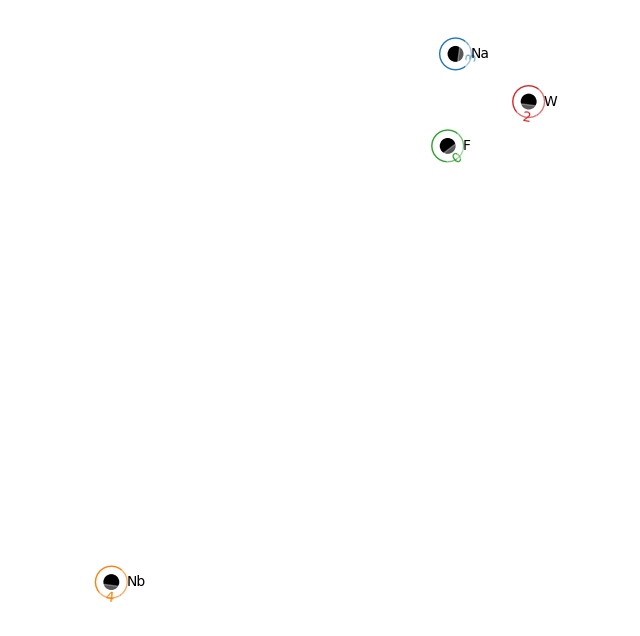

In [ ]:
# Now for external:

node_labels_2_Y = {0: 'Na', 1: 'Nb', 2: 'F', 3: 'W'} # in order according to (50)

graph_Y = hnx.Hypergraph.from_incidence_matrix(stoich_matrix_2_Y) 

hnx.draw(graph_Y, node_labels = node_labels_2_Y)

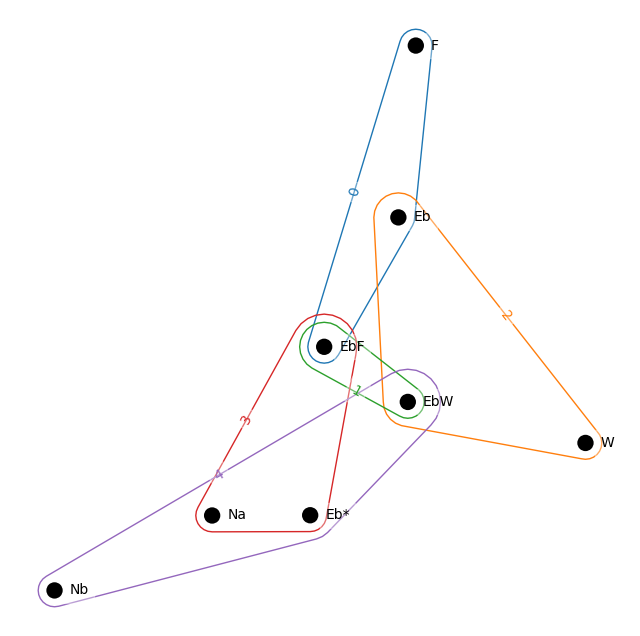

In [ ]:
# full graph with internal and external species


graph_labels = {0: 'Eb', 1: 'EbF', 2: 'EbW', 3: 'Eb*', 4: 'Na', 5: 'Nb', 6: 'F', 7: 'W'} # in order according to (49)

graph_device_2 = hnx.Hypergraph.from_incidence_matrix(stoich_matrix_2)
 
graph_labels = {0: 'Eb', 1: 'EbF', 2: 'EbW', 3: 'Eb*', 4: 'Na', 5: 'Nb', 6: 'F', 7: 'W'} # in order according to (49)

graph_device_2 = hnx.Hypergraph.from_incidence_matrix(stoich_matrix_2)

# Define fixed positions to separate loops

hnx.draw(graph_device_2, node_labels = graph_labels)

#  !! should Na really be in the purple loop? I think I have labelled my species correctly !!

## Now make graph for combined devices:

First we need to build the SM for device 3: the combined devices 1,2. According to Raux 2025 (eq100) and followinf description, the SM for device 3 is:

In [ ]:
# this is built according to the species order: 
# 
graph_nodes_d3 = {0: 'Ea', 1: 'EaS', 2: 'EaS2', 3: 'Na', 4: 'Eb', 5: 'EbF', 6: 'EbW', 7: 'Eb*', 8: 'S', 9: 'Nb', 10: 'F', 11: 'W'}

# should be an 11 x 8 matrix

# row 1 of SM for d3 is built from the row according to 'Ea' in the SM_X of devices 1,2. Note, there is no 'Ea' in device 2 so just take the first row of device 1 and add 0s 
# onto the end to make it 8 values long

row1_Ea_d1 = stoich_matrix_1_X.row(0) # gets row 1 of SM_X for device 1 --> corresponds to species Ea

row1_Ea_d2 = zeros(1, (8 - row1_Ea_d1.cols) ) # since Ea is NOT in either reduced SM for device 2, we make a vector of length long enough to fill SM row of device 3 (full of 0s)

row1_d3 = row1_Ea_d1.row_join(row1_Ea_d2) # join them together

# row 2 is same procedure for EaS:

row2_EaS_d1 = stoich_matrix_1_X.row(1) # gets row 2 of SM_X for device 1 --> corresponds to species EaS

row2_EaS_d2 = zeros(1, (8 - row2_EaS_d1.cols) ) # since EaS is NOT in either reduced SM for device 2, we make a vector of length long enough to fill SM row of device 3 (full of 0s)

row2_d3 = row2_EaS_d1.row_join(row2_EaS_d2)

# row 3 same again for EaS2:

row3_EaS2_d1 = stoich_matrix_1_X.row(2) # gets row 2 of SM_X for device 1 --> corresponds to species EaS

row3_EaS2_d2 = zeros(1, (8 - row3_EaS2_d1.cols) ) # since EaS is NOT in either reduced SM for device 2, we make a vector of length long enough to fill SM row of device 3 (full of 0s)

row3_d3 = row3_EaS2_d1.row_join(row3_EaS2_d2)

row3_d3

# now we do row 4 corresponding to Na, which DOES appear in both: note, Na is in fact the 5th row in SM^1 and SM^2

row5_Na_d1 = stoich_matrix_1.row(4)
row5_Na_d2 = stoich_matrix_2.row(4)

row4_d3 = row5_Na_d1.row_join(row5_Na_d2)

row4_d3

## STOP here - must be an easier way to calculate. first 4 rows are the matrix:

stoich_matrix_3_so_far = row1_d3.col_join(row2_d3).col_join(row3_d3).col_join(row4_d3)

print("First 4 rows of the Stoichiometric Matrix for device 3 are: ") # this is correct so far according to eq(100)
stoich_matrix_3_so_far



First 4 rows of the Stoichiometric Matrix for device 3 are: 


Matrix([
[-1,  1,  0, 0, 0, 0,  0, 0],
[ 1, -1, -1, 0, 0, 0,  0, 0],
[ 0,  0,  1, 0, 0, 0,  0, 0],
[ 0,  1,  0, 0, 0, 0, -1, 0]])

In [ ]:
# For now, we will just write out the SM as it appears in the paper, then use this to calculate the hypergraph:

stoich_matrix_3 = Matrix([[-1,  1,  0,  0,  0,  0,  0, 0],
    [ 1, -1, -1,  0,  0,  0,  0, 0],
    [ 0,  0,  1,  0,  0,  0,  0, 0],
    [ 0,  1,  0,  0,  0,  0, -1, 0],
    [ 0,  0,  0, -1,  0,  1,  0, 0],
    [ 0,  0,  0,  1, -1,  0, -1, 0],
    [ 0,  0,  0,  0, 1,  -1, 0, 1],
    [ 0,  0,  0,  0,  0,  0,  1, -1],
    [-1,  0, -1,  0,  0,  0,  0, 0],
    [ 0,  0,  0,  0,  0,  0,  0, 1],
    [ 0,  0,  0, -1,  0,  0,  0, 0],
    [ 0,  0,  0,  0,  0,  1,  0, 0]]

)

stoich_matrix_3

Matrix([
[-1,  1,  0,  0,  0,  0,  0,  0],
[ 1, -1, -1,  0,  0,  0,  0,  0],
[ 0,  0,  1,  0,  0,  0,  0,  0],
[ 0,  1,  0,  0,  0,  0, -1,  0],
[ 0,  0,  0, -1,  0,  1,  0,  0],
[ 0,  0,  0,  1, -1,  0, -1,  0],
[ 0,  0,  0,  0,  1, -1,  0,  1],
[ 0,  0,  0,  0,  0,  0,  1, -1],
[-1,  0, -1,  0,  0,  0,  0,  0],
[ 0,  0,  0,  0,  0,  0,  0,  1],
[ 0,  0,  0, -1,  0,  0,  0,  0],
[ 0,  0,  0,  0,  0,  1,  0,  0]])

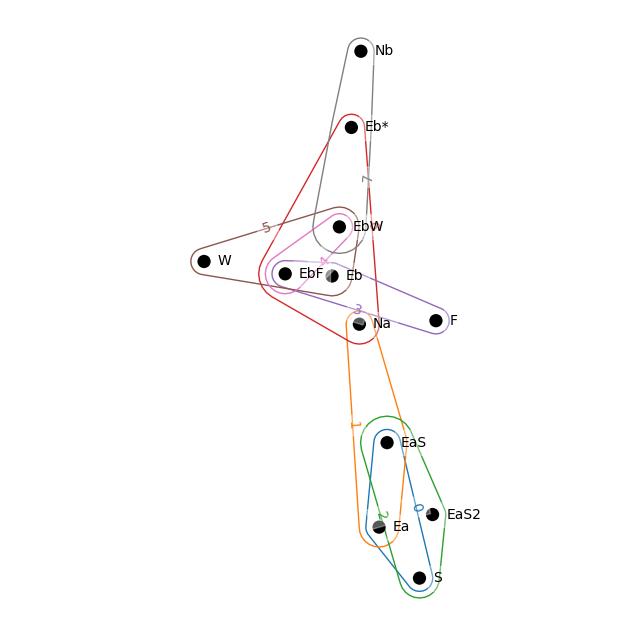

In [ ]:
# now create hypergraph using device nodes defined in previous cell

graph_device_3 = hnx.Hypergraph.from_incidence_matrix(stoich_matrix_3) 

hnx.draw(graph_device_3, node_labels = graph_nodes_d3)

# B. From reaction to cycle currents

In [ ]:
import hypernetx as hnx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import warnings 
init_printing(use_unicode=True)
warnings.simplefilter('ignore')

from sympy import *

In [ ]:
#The reaction currents are:

j1, j2, j3, j4, j5, j6, j7, j8 = symbols("j1 j2 j3 j4 j5 j6 j7 j8") # define symbolic variables so we can solve linear equations later

_j1 = Matrix([j1, j2, j3]) # these vectors contain the edge currents for each device 1,2 eq(51,52)

_j2 = Matrix([j4, j5, j6, j7, j8])

_j2


⎡j₄⎤
⎢  ⎥
⎢j₅⎥
⎢  ⎥
⎢j₆⎥
⎢  ⎥
⎢j₇⎥
⎢  ⎥
⎣j₈⎦

In [ ]:
# The reaction currents above are linearly dependent - so we want to find a linearly independent subset. Can do this by finding the kernel of the
# internal SM_X matrices

nullspace_1_X = stoich_matrix_1_X.nullspace()

nullspace_1_X = Matrix(nullspace_1_X) # we get a single vector of internal currents that result in a steady state

C_1 = nullspace_1_X

C_1

⎡1⎤
⎢ ⎥
⎢1⎥
⎢ ⎥
⎣0⎦

In [ ]:
nullspace_2_X = stoich_matrix_2_X.nullspace()

nullspace_2_X_m = nullspace_2_X[0].row_join(nullspace_2_X[1]) # make the nullspace into a matrix of adjacent columns

C_2 = nullspace_2_X_m

C_2


⎡1  0 ⎤
⎢     ⎥
⎢1  -1⎥
⎢     ⎥
⎢1  0 ⎥
⎢     ⎥
⎢0  1 ⎥
⎢     ⎥
⎣0  1 ⎦

In [ ]:
# this above nullspace is not the same as in the paper eq(53) so is there a matrix s.t C_python * P = C_paper?

C_paper = Matrix([[0,1], [-1,1], [0,1], [1,0], [1,0]]) # C^(2) from eq(53)

# since C_2, C_paper are both not square, they are not ordinary invertible --> use the Moore-Penrose invertibility 
# so P = C_2_(Moore-Penrose) * C_paper

C_2_MPI = ( C_2.T * C_2).inv() * C_2.T # find Moore-Penrose inverse via 2024 paper page 3

P = C_2_MPI * C_paper
 
P # Is P analagous to Pauli Z matrix?


⎡0  1⎤
⎢    ⎥
⎣1  0⎦

In [ ]:
# Check: 

C_check = C_2 * P

C_check

# works, so now set C_2 = C_check for remainder of paper

C_2 = C_check

In [ ]:
# Lets find the reaction current relations: we know by eq(21): nabla_X * _j = 0

steady_state_1 = stoich_matrix_1_X * _j1

Z_1 = zeros(3,1)

Eq( steady_state_1 , Z_1) # prints nicely


⎡  -j₁ + j₂  ⎤   ⎡0⎤
⎢            ⎥   ⎢ ⎥
⎢j₁ - j₂ - j₃⎥ = ⎢0⎥
⎢            ⎥   ⎢ ⎥
⎣     j₃     ⎦   ⎣0⎦

In [ ]:
steady_state_2 = stoich_matrix_2_X * _j2

Z_2 = zeros(4,1)

Eq( steady_state_2, Z_2 )

⎡  -j₄ + j₆  ⎤   ⎡0⎤
⎢            ⎥   ⎢ ⎥
⎢j₄ - j₅ - j₇⎥   ⎢0⎥
⎢            ⎥ = ⎢ ⎥
⎢j₅ - j₆ + j₈⎥   ⎢0⎥
⎢            ⎥   ⎢ ⎥
⎣  j₇ - j₈   ⎦   ⎣0⎦

In [ ]:

# so we can use sympy linsolve to solve these: First for device 1:

eqs_1 = [Eq(expr, 0) for expr in steady_state_1]

# solve for (j1, j2, j3)
solution_1 = linsolve(eqs_1, (j1, j2, j3))

solution_1

In [ ]:
# now for device 2:

eqs_2 = [Eq(expr, 0) for expr in steady_state_2]

# solve for (j4 j5 j6 j7 j8)
solution_2 = linsolve(eqs_2, (j4, j5, j6, j7, j8))

solution_2

In [ ]:
# therefore we have calculated equations (54, 55):

reaction_current_soln_set = [Eq(j1,j2), Eq(j3,0), Eq(j3,0), Eq(j4, j6), Eq(j5, j6-j8), Eq(j7, j8)]

reaction_current_soln_set


In [ ]:
# Now we can find the cycle currents J according to J = C_MPI * _j (eq22)

C_1_MPI = ( C_1.T * C_1).inv() * C_1.T # find MPI of Cycle vector for device 1

C_2_MPI = ( C_2.T * C_2).inv() * C_2.T # find MPI of cycle matrix for device 2

C_1_MPI


[1/2  1/2  0]

In [ ]:
# Now find cycle current vector / matrix

J_1 = C_1_MPI * _j1

J_1

J_2 = C_2_MPI * _j2

In [ ]:
# But we now know that j1 = j2 so we get: (eq 56)

J_1_simplified = Matrix([j1])

J_1_simplified

Eq(J_1, J_1_simplified, evaluate = False)

⎡j₁   j₂⎤       
⎢── + ──⎥ = [j₁]
⎣2    2 ⎦       

In [ ]:
# and for device 2: (eq 57)

J_2_simplified = Matrix([[j8], [j6]])

J_2_simplified

Eq(J_2, J_2_simplified, evaluate = False)


⎡j₄   j₅   j₆   3⋅j₇   3⋅j₈⎤       
⎢── - ── + ── + ──── + ────⎥       
⎢8    4    8     8      8  ⎥   ⎡j₈⎤
⎢                          ⎥ = ⎢  ⎥
⎢3⋅j₄   j₅   3⋅j₆   j₇   j₈⎥   ⎣j₆⎦
⎢──── + ── + ──── + ── + ──⎥       
⎣ 8     4     8     8    8 ⎦       

In [ ]:
Matrix([j1,j1,0])

#J, C_plus, j = symbols('J C^+ j')

#Eq(J,C_plus *j, evaluate = False)

stoich_matrix_1_Y.nullspace()

-stoich_matrix_1_Y



⎡1  0   1⎤
⎢        ⎥
⎣0  -1  0⎦

## So now we have the Cycle currents for the internal species, lets look at the the external species


## start from eq(23): $ li = -l \nabla_Y j = -l  \nabla_Y C J = 0  $

In [ ]:
# we already have the cycle vectors C and the cycle currents J so can define the matrix of matter exchanged with chemostats
# in each cycle as _phi = nabla_Y * C  

_phi_1 = stoich_matrix_1_Y * C_1

_phi_1 # (58)


⎡-1⎤
⎢  ⎥
⎣1 ⎦

In [ ]:
# and for device 2: (58)

_phi_2 = stoich_matrix_2_Y * C_2

_phi_2



⎡-1  0 ⎤
⎢      ⎥
⎢1   0 ⎥
⎢      ⎥
⎢0   -1⎥
⎢      ⎥
⎣0   1 ⎦

In [ ]:
S_1_MPI * i_1_rightside

⎡i_r__{(1)}  -i_r__{(1)} ⎤
⎢──────────  ────────────⎥
⎣    2            2      ⎦

# Summary so far for finding Conductance matrix for device 3:

1) Find stoichiometric matrices for internal and external components of device 1,2: $\mathbf{\nabla_X}^{(m)}$ and $\mathbf{\nabla_Y}^{(m)}$
2) Find SM for device 3: $\mathbf{\nabla}^{(3)}$
3) create reaction current vectors for devices 1,2: $\mathbf{j}^{(1)}$ and $\mathbf{j}^{(2)}$
4) find the kernel of the internal SMs for each device ( the cycle matrices ): $ \mathbf{C}^{(m)} = \ker(\mathbf{\nabla}_{X}^{(m)}) $
5) Use steady state assumption to solve the set of linear equations: $ \mathbf{\nabla}_{X} \mathbf{j} = \mathbf{0}$
6) use the cycle matrices and reaction current vectors to find the cycle currents $\mathbf{J}$ using: $\mathbf{j} = \mathbf{CJ}$
7) simplify cycle currents $\mathbf{J^{(1)}, J^{(2)}}$ using solutions from step 5)
8) find the matrices for each device that provide the matter exchanged with with chemostats (via external species) during each cycle:
    $\mathbf{\phi} == \mathbf{\nabla_Y C}$

# C. From physical to fundamental currents

In [ ]:
# lets begin finding the conservation matrices

# find the cokernel (left nullspace i.e nullspace of transpose of SM) of the stoichiometric matrices for devices 1,2

L_1 = (stoich_matrix_1.T).nullspace()

L_1 = Matrix( [L_1[0].row_join(L_1[1])]).T

L_1 # this is eq(59)

⎡1   1   1  0  0⎤
⎢               ⎥
⎣-2  -1  0  1  1⎦

In [ ]:
L_2 = (stoich_matrix_2.T).nullspace()

L_2 = Matrix( [L_2[0].row_join(L_2[1]).row_join(L_2[2])]).T

L_2 # this is eq(59)

⎡1   1   1   1  0  0  0  0⎤
⎢                         ⎥
⎢-1  -1  -1  0  1  1  0  0⎥
⎢                         ⎥
⎣-1  0   0   0  0  0  1  1⎦

In [ ]:
#can split these matrices into the borken and unbroken conservation law sections: unbroken
# is the components of the Moeity vector that are conserved whatever the current from reservoir is

l_1_U = L_1[0,:] # first row of L_1

l_1_B = L_1[1,:] # second row of L_1

l_2_U = L_2[0,:]

l_2_B = L_2[1:,:]


In [ ]:
# Then again these can be decomposed into the internal and external species for borken and unbrok

# For L_1:

l_1_U_X = l_1_U[0,:3] # top left of L_1

l_1_U_Y = l_1_U[0, 3:] # top right of L_1

l_1_B_X = l_1_B[0,:3] # bottom left of L_1

l_1_B_Y = l_1_B[0,3:] # bottom right of L_1; is (61) first eq - conservation laws for currents from chemostats

In [ ]:
# and L_2: eq(60)

l_2_U_X = l_2_U[0,:4] # top left of L_2

l_2_U_Y = l_2_U[0, 4:] #  top right of L_2; = 0 in (60) because external species have no unbroken lines

l_2_B_X = l_2_B[0:,:4] # bottom left of L_2

l_2_B_Y = l_2_B[0:,4:] # bottom right of L_2; (61) second eq - conservation laws for currents from chemostats



In [ ]:
# the matrices l_1_B_X and l_1_B_Y are in the cokernel of the matrices _phi_1 and _phi_2:

_phi_1.T.nullspace()

#_phi_2.T.nullspace()


⎡⎡1⎤⎤
⎢⎢ ⎥⎥
⎣⎣1⎦⎦

In [ ]:
# can calculate the physical currents using (10):  _i = nabla_Y * _j

_i_1 = -stoich_matrix_1_Y*_j1 # which of course simplifies to (j1, -j1)^T using the solved linear eqs

_i_2 = -stoich_matrix_2_Y*_j2 # becomes (j8, -j8, j6, -j6)^T (eq 63)

#_i_1 = Matrix([j1, -j1])

#_i_2 = Matrix([j8, -j8, j6, -j6])

_i_2

_i_1

⎡j₁ + j₃⎤
⎢       ⎥
⎣  -j₂  ⎦

In [ ]:
# from (61) we see the conservation matrices, l^(1) = (1 1) for example means
# that the sum of the external currents in device 1 obey: j_1 + j_2 = 0,
# hence we know j_1 = - j_2. Therefore, this condition is spanned by the vector
# S^(1) = ( 1 -1 )^T

S_1 = Matrix([1,-1])

S_2 = Matrix([[1,0], [-1,0], [0,1], [0,-1]]) # (64)

S_1

⎡1 ⎤
⎢  ⎥
⎣-1⎦

In [ ]:
# can now find the fundamental curretns I for each device by: i = SI

I_1 = (S_1.T * S_1)**(-1) * S_1.T * _i_1

# but recall j3 = 0, j2 = j1 so

I_1 = j1

# 

I_2 = (S_2.T * S_2)**(-1) * S_2.T * _i_2

# but recall j4 = j6, j7 = j8 so

I_2 = Matrix([j8, j6])

I_2

⎡j₈⎤
⎢  ⎥
⎣j₆⎦

## D. Thermodynamic forces

In [ ]:
# the thermodynamic forces in terms of the reaction affinities are 

mu_Ea, mu_S, mu_EaS, mu_Na, mu_EaS2, mu_Eb, mu_F, mu_EbF, mu_EbW, mu_W, mu_Ebstar, mu_Nb = symbols(" \mu_{Ea} \mu_S \mu_{EaS} \mu_{Na} \mu_{EaS2} \mu_{Eb}  \mu_F \mu_{EbF} \mu_{EbW} \mu_W \mu_{Eb*} \mu_{Nb} ")


f_1 = Matrix([[mu_Ea + mu_S - mu_EaS], [mu_EaS - mu_Na - mu_Ea], [mu_EaS + mu_S - mu_EaS2]])

f_2 = Matrix([
    [mu_Eb + mu_F - mu_EbF],
    [mu_EbF - mu_EbW],
    [mu_EbW - mu_W - mu_Eb],
    [mu_EbF + mu_Na - mu_Ebstar],
    [mu_Ebstar - mu_Nb - mu_EbW]
])

f_2



⎡  \mu_F - \mu_{EbF} + \mu_{Eb}   ⎤
⎢                                 ⎥
⎢      \mu_{EbF} - \mu_{EbW}      ⎥
⎢                                 ⎥
⎢  -\mu_W + \mu_{EbW} - \mu_{Eb}  ⎥
⎢                                 ⎥
⎢-\mu_{Eb*} + \mu_{EbF} + \mu_{Na}⎥
⎢                                 ⎥
⎣\mu_{Eb*} - \mu_{EbW} - \mu_{Nb} ⎦

In [ ]:
# now we can find the cycle forces for modules 1,2

F_1 = C_1.T * f_1 #(68)

F_2 = C_2.T * f_2 # (69)

F_2

⎡\mu_{Na} - \mu_{Nb}⎤
⎢                   ⎥
⎣   \mu_F - \mu_W   ⎦

In [ ]:
# the cycle forces are conjugated to the cycle currents. The associated chemical potential vectors are

a_1 = Matrix( [mu_S, mu_Na]) # (70)
 
a_2 = Matrix( [mu_Na, mu_Nb, mu_F, mu_W]) # (71)

a_1

⎡ \mu_S  ⎤
⎢        ⎥
⎣\mu_{Na}⎦

In [ ]:
# Now we can find the fundamental force vectors 

A_1 = a_1.T * S_1

A_2 = a_2.T * S_2

A_2


[\mu_{Na} - \mu_{Nb}  \mu_F - \mu_W]

## E. Conductance matrices

In [ ]:
# F = RJ, where R = C.T _r C at the cycle level. and  we can finf the cycle resitance matrices:

r1, r2, r3, r4,r5,r6,r7,r8 = symbols('r1 r2 r3 r4 r5 r6 r7 r8') # where each rp = fp / jp

_r_1 = diag(r1, r2, r3) # (74)

_r_2 = diag(r4,r5,r6,r7,r8) # (75)



In [32]:
# now we can find the resistance matrices

R_1 = C_1.T * _r_1 * C_1

R_2 = C_2.T * _r_2 * C_2


C_2.T *_r_2 * C_2




NameError: name 'C_1' is not defined

In [ ]:
# and by g = phi R^-1 phi.T we find the conductance matrices at physical level

_g_1 = _phi_1 * R_1.inv() * _phi_1.T

_g_2 = _phi_2 * R_2.inv() * _phi_2.T

_g_2

⎡                        r₄ + r₅ + r₆                                          ↪
⎢─────────────────────────────────────────────────────────────  ────────────── ↪
⎢r₄⋅r₅ + r₄⋅r₇ + r₄⋅r₈ + r₅⋅r₆ + r₅⋅r₇ + r₅⋅r₈ + r₆⋅r₇ + r₆⋅r₈  r₄⋅r₅ + r₄⋅r₇  ↪
⎢                                                                              ↪
⎢                      -(r₄ + r₅ + r₆)                                         ↪
⎢─────────────────────────────────────────────────────────────  ────────────── ↪
⎢r₄⋅r₅ + r₄⋅r₇ + r₄⋅r₈ + r₅⋅r₆ + r₅⋅r₇ + r₅⋅r₈ + r₆⋅r₇ + r₆⋅r₈  r₄⋅r₅ + r₄⋅r₇  ↪
⎢                                                                              ↪
⎢                             r₅                                               ↪
⎢─────────────────────────────────────────────────────────────  ────────────── ↪
⎢r₄⋅r₅ + r₄⋅r₇ + r₄⋅r₈ + r₅⋅r₆ + r₅⋅r₇ + r₅⋅r₈ + r₆⋅r₇ + r₆⋅r₈  r₄⋅r₅ + r₄⋅r₇  ↪
⎢                                                                              ↪
⎢                           

In [ ]:
# this is clearly not useful so simplify by taking out 1/det(R_2)

R_2.det()

_g_2 * R_2.det() # note that this needs the 1/det(R_2) factor to be valid

⎡r₄ + r₅ + r₆   -r₄ - r₅ - r₆       r₅             -r₅     ⎤
⎢                                                          ⎥
⎢-r₄ - r₅ - r₆  r₄ + r₅ + r₆        -r₅            r₅      ⎥
⎢                                                          ⎥
⎢     r₅             -r₅       r₅ + r₇ + r₈   -r₅ - r₇ - r₈⎥
⎢                                                          ⎥
⎣     -r₅            r₅        -r₅ - r₇ - r₈  r₅ + r₇ + r₈ ⎦

In [ ]:
# now we can find the conductance matrices at fundamental level G = S+ g S+.T

S_1_MPI = ( S_1.T * S_1).inv() * S_1.T

S_2_MPI = ( S_2.T * S_2).inv() * S_2.T

G_1 = S_1_MPI * _g_1 * S_1_MPI.T

G_2 = S_2_MPI * _g_2 * S_2_MPI.T

G_2*R_2.det() # same as before we can simplify by taking out the det R_2


⎡r₄ + r₅ + r₆       r₅     ⎤
⎢                          ⎥
⎣     r₅       r₅ + r₇ + r₈⎦

## F. Counductance matrix of the full network (1. By law of resitance matrix addition)

In [ ]:
_i_1 = Matrix([j1, -j1]) # (82)

_i_1 # simplified by the solved current equations

_i_2 = Matrix([j8, -j8, j6, -j6]) # (83)

_i_2

⎡j₈ ⎤
⎢   ⎥
⎢-j₈⎥
⎢   ⎥
⎢j₆ ⎥
⎢   ⎥
⎣-j₆⎦

In [ ]:
# we can construct the physical currents of module 3 by _i_3 = ( _i_1_leftside   _i_2_rightside), considering how they are physically joined together and by looking 
# at the directions of the currents in Fig.2

_i_1_leftside = _i_1.row(0)

_i_2_rightside = Matrix([_i_2.row(1), _i_2.row(2), _i_2.row(3)])

# then for module 3:

_i_3 = Matrix([_i_1_leftside, _i_2_rightside]) # (84)

_i_3 

⎡j₁ ⎤
⎢   ⎥
⎢-j₈⎥
⎢   ⎥
⎢j₆ ⎥
⎢   ⎥
⎣-j₆⎦

In [ ]:
# we can set the following equality due to the serial associatioan of devices and continuity of chemical potenital the interface

Li, i_1_rightside, Le, i_3 = symbols("\mathbf{L}_i i_r^{(1)} \mathbf{L}_e \mathbf{i}^{(3)}")

Eq(Li*i_1_rightside, Le*i_3)

# where the matrices L_i and L_e are defined in terms of the conservation laws of the left and right currents of devices 1,2 at the interface (see 40 in 2024 paper)

In [ ]:
# the matrices L_i and L_e are (86)

L_i = Matrix([-1, 1, 0])

L_e = Matrix([[1, 0, 0, 0], [0,1,0,0], [0,0,1,1]])

L_e

⎡1  0  0  0⎤
⎢          ⎥
⎢0  1  0  0⎥
⎢          ⎥
⎣0  0  1  1⎦

In [ ]:
# and we can find the following matrix v with lines as the basis vectors of the cokernel of L_i

cokern_L_i = (L_i.T).nullspace()

_v = Matrix([cokern_L_i[0].T, cokern_L_i[1].T]) # (87)

_v


⎡1  1  0⎤
⎢       ⎥
⎣0  0  1⎦

In [ ]:
# via the conservation laws for device 3 we know that _l_3 * _i_3 = _0 where

l_3 = _v * L_e # (89) Note that this is equivalent to l_2

l_3

⎡1  1  0  0⎤
⎢          ⎥
⎣0  0  1  1⎦

In [ ]:
# since l_3 = l_2 can say S_3 = S_2. Also, since i_1_rightside = - i_2_leftside at the interface:

# define operator pi s.t

pi = (( L_i.T * L_i).inv() * L_i.T) * L_e

# we get

pi * _i_3

# which is == - i_2_leftside (since j1 = j8 due to serial connection)



⎡  j₁   j₈⎤
⎢- ── - ──⎥
⎣  2    2 ⎦

In [ ]:
# for device m this means _i_(m) = pi_(m,3) * _i_3 giving, using (82, 83) we can see the following

pi_1_2 = Matrix([[1,0,0,0], [-1/2,1/2,0,0]]) # (93)

pi_2_3 = Matrix([[1/2,-1/2,0,0], [0,1,0,0], [0,0,1,0], [0,0,0,1]]) # (94)

pi_2_3


⎡0.5  -0.5  0  0⎤
⎢               ⎥
⎢ 0    1    0  0⎥
⎢               ⎥
⎢ 0    0    1  0⎥
⎢               ⎥
⎣ 0    0    0  1⎦

In [ ]:
# using (96) and (95) we can find the pi operators for the fundamental currents:

# recall S_3 = S_2 here:

PI_2_3 = S_2_MPI * pi_2_3 * S_2 # (97)

PI_1_3 = S_1_MPI * pi_1_2 * S_2 # (97)


In [ ]:
# then finally we get the fundamental resitance matrix of module 3 (conductance matrix ^-1) using (98)


G_3_inv = (PI_1_3.T * G_1.inv() * PI_1_3) + (PI_2_3.T * G_2.inv() * PI_2_3)

G_3_inv # (99)

⎡1.0⋅r₁ + 1.0⋅r₂ + 1.0⋅r₅ + 1.0⋅r₇ + 1.0⋅r₈    -1.0⋅r₅   ⎤
⎢                                                        ⎥
⎣                 -1.0⋅r₅                    r₄ + r₅ + r₆⎦

## F. Conductance matrix of full network (2. By direct derivation)

In [ ]:
# if we know the full SM of module 3
stoich_matrix_3

⎡-1  1   0   0   0   0   0   0 ⎤
⎢                              ⎥
⎢1   -1  -1  0   0   0   0   0 ⎥
⎢                              ⎥
⎢0   0   1   0   0   0   0   0 ⎥
⎢                              ⎥
⎢0   1   0   0   0   0   -1  0 ⎥
⎢                              ⎥
⎢0   0   0   -1  0   1   0   0 ⎥
⎢                              ⎥
⎢0   0   0   1   -1  0   -1  0 ⎥
⎢                              ⎥
⎢0   0   0   0   1   -1  0   1 ⎥
⎢                              ⎥
⎢0   0   0   0   0   0   1   -1⎥
⎢                              ⎥
⎢-1  0   -1  0   0   0   0   0 ⎥
⎢                              ⎥
⎢0   0   0   0   0   0   0   1 ⎥
⎢                              ⎥
⎢0   0   0   -1  0   0   0   0 ⎥
⎢                              ⎥
⎣0   0   0   0   0   1   0   0 ⎦

In [ ]:
# then from paper we know that upper 3x3 matrix is SM_1_X, and the 4x5 matrix from row 5-8 is SM_2_X and we can find the cycles

SM_1_X = stoich_matrix_3[0:3, 0:3]

SM_2_X = stoich_matrix_3[4:8, 3: ]

SM_2_X


⎡-1  0   1   0   0 ⎤
⎢                  ⎥
⎢1   -1  0   -1  0 ⎥
⎢                  ⎥
⎢0   1   -1  0   1 ⎥
⎢                  ⎥
⎣0   0   0   1   -1⎦

In [ ]:
SM_1_X

⎡-1  1   0 ⎤
⎢          ⎥
⎢1   -1  -1⎥
⎢          ⎥
⎣0   0   1 ⎦

In [ ]:
SM_3_X = diag(SM_1_X, SM_2_X)

SM_3_X = stoich_matrix_3[0:8,0:8]

SM_3_X

⎡-1  1   0   0   0   0   0   0 ⎤
⎢                              ⎥
⎢1   -1  -1  0   0   0   0   0 ⎥
⎢                              ⎥
⎢0   0   1   0   0   0   0   0 ⎥
⎢                              ⎥
⎢0   1   0   0   0   0   -1  0 ⎥
⎢                              ⎥
⎢0   0   0   -1  0   1   0   0 ⎥
⎢                              ⎥
⎢0   0   0   1   -1  0   -1  0 ⎥
⎢                              ⎥
⎢0   0   0   0   1   -1  0   1 ⎥
⎢                              ⎥
⎣0   0   0   0   0   0   1   -1⎦

In [ ]:
kernel_of_SM_3_X = SM_3_X.nullspace()

kernel_of_SM_3_X

⎡⎡0⎤  ⎡1 ⎤⎤
⎢⎢ ⎥  ⎢  ⎥⎥
⎢⎢0⎥  ⎢1 ⎥⎥
⎢⎢ ⎥  ⎢  ⎥⎥
⎢⎢0⎥  ⎢0 ⎥⎥
⎢⎢ ⎥  ⎢  ⎥⎥
⎢⎢1⎥  ⎢0 ⎥⎥
⎢⎢ ⎥, ⎢  ⎥⎥
⎢⎢1⎥  ⎢-1⎥⎥
⎢⎢ ⎥  ⎢  ⎥⎥
⎢⎢1⎥  ⎢0 ⎥⎥
⎢⎢ ⎥  ⎢  ⎥⎥
⎢⎢0⎥  ⎢1 ⎥⎥
⎢⎢ ⎥  ⎢  ⎥⎥
⎣⎣0⎦  ⎣1 ⎦⎦

In [ ]:
# and hence the cycle matrix for device 3 is:

cycle_matrix_3 = cycle_1.row_join(kernel_of_SM_3_X[1])

cycle_matrix_3 # (102)

⎡1   0⎤
⎢     ⎥
⎢1   0⎥
⎢     ⎥
⎢0   0⎥
⎢     ⎥
⎢0   1⎥
⎢     ⎥
⎢-1  1⎥
⎢     ⎥
⎢0   1⎥
⎢     ⎥
⎢1   0⎥
⎢     ⎥
⎣1   0⎦

In [ ]:
# the reaction resitance matrix is

_r_3 = diag(r1, r2, r3 ,r4, r5, r6, r7, r8) # (103)

# and hence we can find the cycle resitsnace matrix

R_3 = cycle_matrix_3.T * _r_3 * cycle_matrix_3 # (104)

R_3

⎡r₁ + r₂ + r₅ + r₇ + r₈      -r₅     ⎤
⎢                                    ⎥
⎣         -r₅            r₄ + r₅ + r₆⎦

In [ ]:
# which is the same as before